#  Credit card applications
<p>Commercial banks receive <em>a lot</em> of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques, just like the real banks do.</p>
<p><img src="https://assets.datacamp.com/production/project_558/img/credit_card.jpg" alt="Credit card being held in hand"></p>
<p>We'll use the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository. The structure of this notebook is as follows:</p>
<ul>
    <li>First, we will start off by loading and viewing the dataset.</li>
    <li>we will do some data wrangling and handel the missing values. </li>
    <li>We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.</li>
    <li>we will see some exploratory data analysis to get a good intuition about the data.</li>
    <li>we will build a machine learning model that can predict if an individual's application for a credit card will be accepted, we will Apply these machine learning techniques <code>Logistic Regression</code> , <code>Random Forest</code>, <code>Support vector machine</code>, <code>Gradient Boosting</code> and finally <code>Extreme Gradient Boosting</code> </li>
    <li>Finally, we will choose the best machine learning technique according to Accuracy score and tune this model to get the best estimator </li>
 </ul>
 <p>First, loading and viewing the dataset</p>

In [41]:
#importing libraries
import pandas as pd 
import numpy as np


In [42]:
#Reading the dataset
data = pd.read_csv('cc_approvals.data',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


# Data Warngling
<p>The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives us a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. This gives us a pretty good starting point, and we can map these features with respect to the columns in the output.   </p>
<p> so at first let's give our columns header a names to be aware of what we're doing</p>

In [43]:
data.columns=['gender','age','debt','married','bank_customer','education_level','ethnicity','years_employed','prior_default',
              'emploted','credit_score','drivers_lincense','citize','zipcode','income','approvel_status']
data

,gender,age,debt,married,bank_customer,education_level,ethnicity,years_employed,prior_default,emploted,credit_score,drivers_lincense,citize,zipcode,income,approvel_status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


now let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.

In [44]:
# summary statistics
cc_apps_description = data.describe()
print(cc_apps_description)

print("\n")

# Printing DataFrame information
cc_apps_info = data.info()
print(cc_apps_info)

print("\n")

# Printing The last 17 Rows

print(data.tail(17))

             debt  years_employed  credit_score         income
count  690.000000      690.000000     690.00000     690.000000
mean     4.758725        2.223406       2.40000    1017.385507
std      4.978163        3.346513       4.86294    5210.102598
min      0.000000        0.000000       0.00000       0.000000
25%      1.000000        0.165000       0.00000       0.000000
50%      2.750000        1.000000       0.00000       5.000000
75%      7.207500        2.625000       3.00000     395.500000
max     28.000000       28.500000      67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            690 non-null    object 
 1   age               690 non-null    object 
 2   debt              690 non-null    float64
 3   married           690 non-null    object 
 4   bank_customer     690 non-null    objec

# Handling the missing values (part i)
<p>We've uncovered some issues that will affect the performance of our machine learning model(s) if they go unchanged:</p>
<ul>
<li>Our dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.</li>
<li>The dataset also contains values from several ranges. Some features have a value range of 0 - 28, some have a range of 2 - 67, and some have a range of 1017 - 100000. Apart from these, we can get useful statistical information (like <code>mean</code>, <code>max</code>, and <code>min</code>) about the features that have numerical values. </li>
<li>Finally, the dataset has missing values, which we'll take care of in this task. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output.</li>
</ul>
<p>Now, let's temporarily replace these missing value question marks with NaN.</p>

In [45]:
# Replacing the '?'s with NaN
data = data.replace('?',np.nan)

# Inspect the missing values again
print(data.tail(17))

    gender    age    debt married bank_customer education_level ethnicity  \
673    NaN  29.50   2.000       y             p               e         h   
674      a  37.33   2.500       u             g               i         h   
675      a  41.58   1.040       u             g              aa         v   
676      a  30.58  10.665       u             g               q         h   
677      b  19.42   7.250       u             g               m         v   
678      a  17.92  10.210       u             g              ff        ff   
679      a  20.08   1.250       u             g               c         v   
680      b  19.50   0.290       u             g               k         v   
681      b  27.83   1.000       y             p               d         h   
682      b  17.08   3.290       u             g               i         v   
683      b  36.42   0.750       y             p               d         v   
684      b  40.58   3.290       u             g               m         v   

# Handling the missing values (part ii)
<p>We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.</p>
<p>now let's take a look about the distribution of the missing values and creat a bar char to see the actual number of the missing values at each coulmns using <code>missingno</code>library

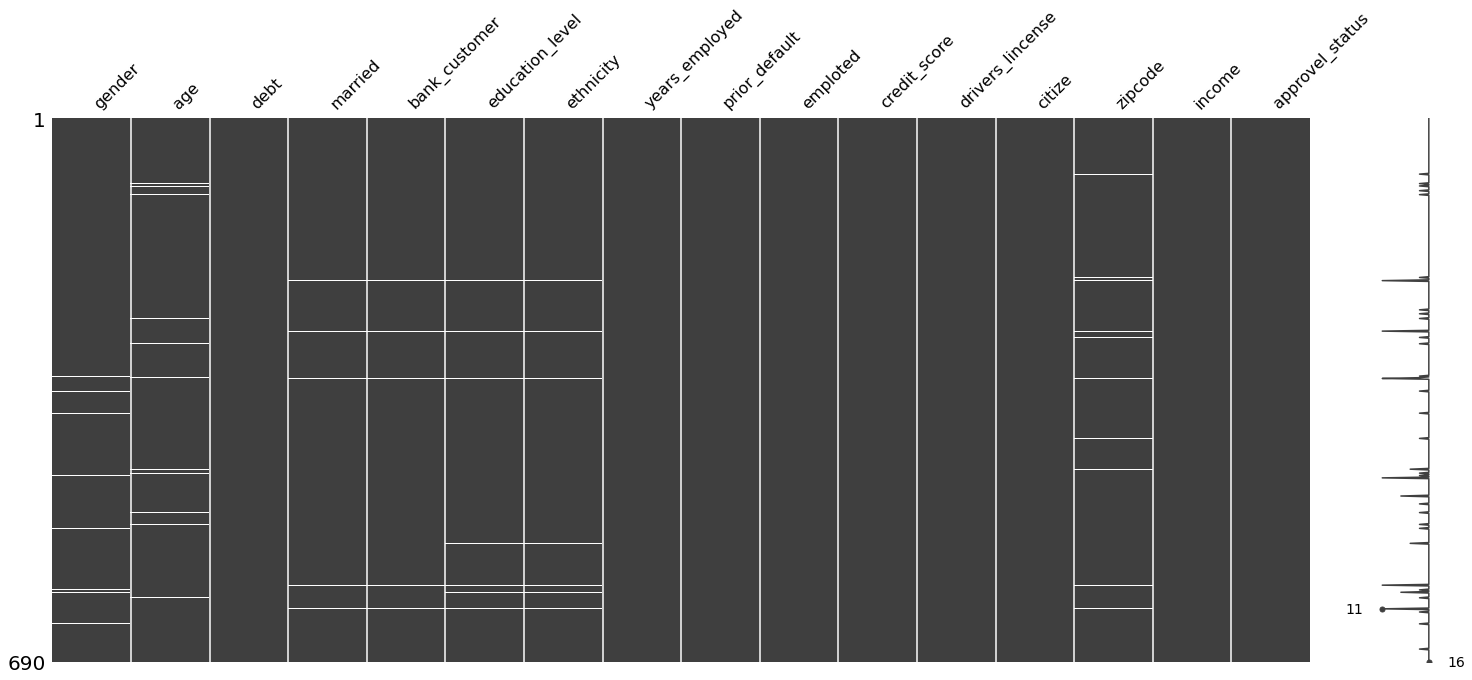

In [46]:
#the distribution of the missing values
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
msno.matrix(data)
plt.show()


<AxesSubplot:>

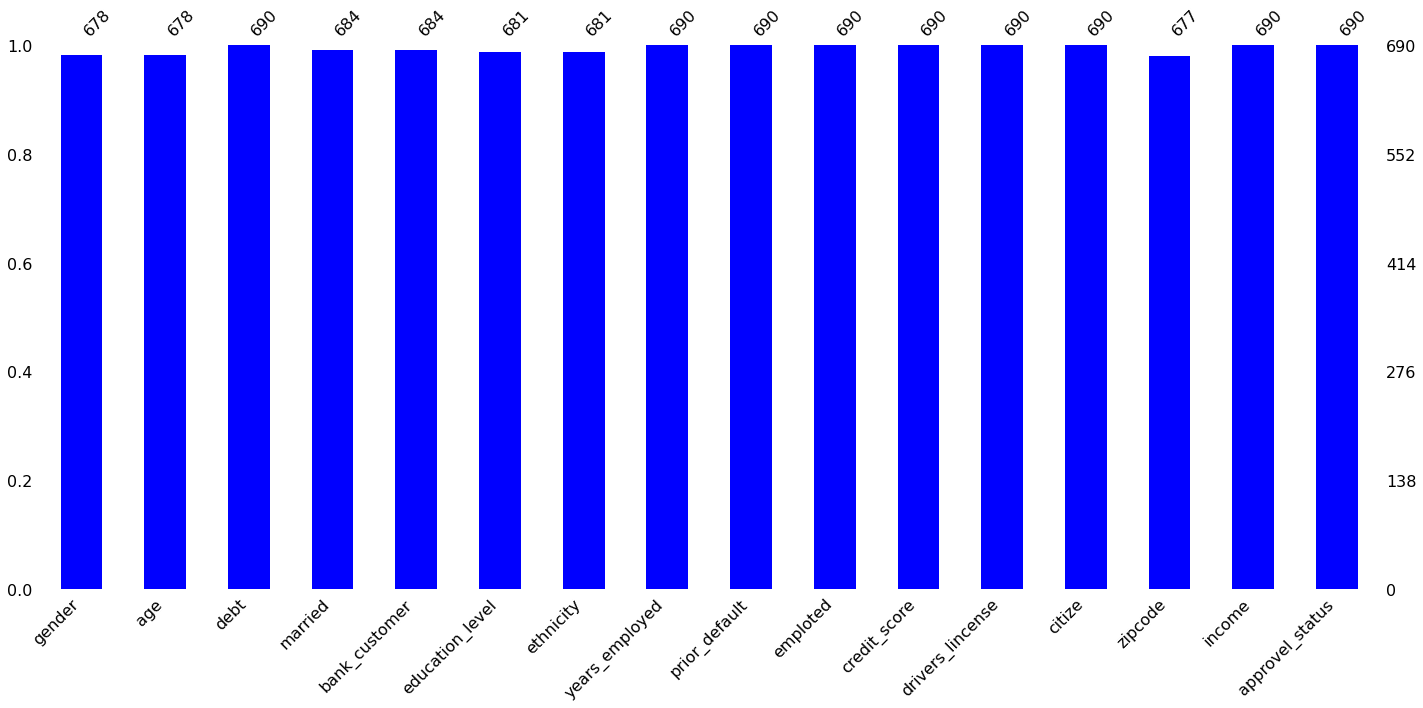

In [47]:
#bar plot for the missing values
msno.bar(data,color='blue')


In [48]:
# Counting the number of NaNs in the dataset to verify
cc_apps.isnull().sum()

gender              12
age                 12
debt                 0
married              6
bank_customer        6
education_level      9
ethnicity            9
years_employed       0
prior_default        0
emploted             0
credit_score         0
drivers_lincense     0
citize               0
zipcode             13
income               0
approvel_status      0
dtype: int64

# Handling the missing values (part iii)
<p> so we could gain from the plots the following</p>
<ol>
    <li>All the missing values are in the categorical columns</li>
    <li>the columns <code>married</code> and <code>bank_customer</code> thier missing data distributions are the same which means the missing data at these columns for the same people and the same thing for <code>education_level</code> and <code>ethnicity</code> </li>
    <li>for the missing values at the columns <code>gender</code>, <code>age</code> and <code>zipcode</code> are distributed randomly</li>
</ol>
<p>We are going to impute these missing values with the most frequent values as present in these columns <code>gender</code>, <code>age</code> and <code>zipcode</code></p>

In [92]:
# Iterating over each column of cc_apps
for col in ['married','bank_customer','education_level','ethnicity','gender','age','zipcode']:
    data[col] = data[col].fillna(data[col].value_counts().index[0])


# Counting the number of NaNs in the dataset and print the counts to verify

data.isnull().sum()

gender              0
age                 0
debt                0
married             0
bank_customer       0
education_level     0
ethnicity           0
years_employed      0
prior_default       0
emploted            0
credit_score        0
drivers_lincense    0
citize              0
zipcode             0
income              0
approvel_status     0
dtype: int64

## 6. Preprocessing the data (part i)
<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Split the data into train and test sets. </li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will be converting all the non-numeric values into numeric ones

In [97]:
#importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#converting the catecorical values to numeric
for col in data.columns:
    if data[col].dtype == 'object':
        data[col]=le.fit_transform(data[col])

In [98]:
data.head()

,gender,age,debt,married,bank_customer,education_level,ethnicity,years_employed,prior_default,emploted,credit_score,drivers_lincense,citize,zipcode,income,approvel_status
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,68,0,0
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,11,560,0
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,96,824,0
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,31,3,0
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,37,0,0


# Correlation
<p> after converting categorical data to numerical, let's see the the corrleation between the features and label [<code>approvel_status</code>] </p>
<p>we want from this stage to do the follewing</p>
<ol>
    <li>Creating heatmap plot</li>
    <li>making some feature engineering</li>
</ol>
<p>so let's get the work done</p>

#### Creating heatmap plot

<AxesSubplot:>

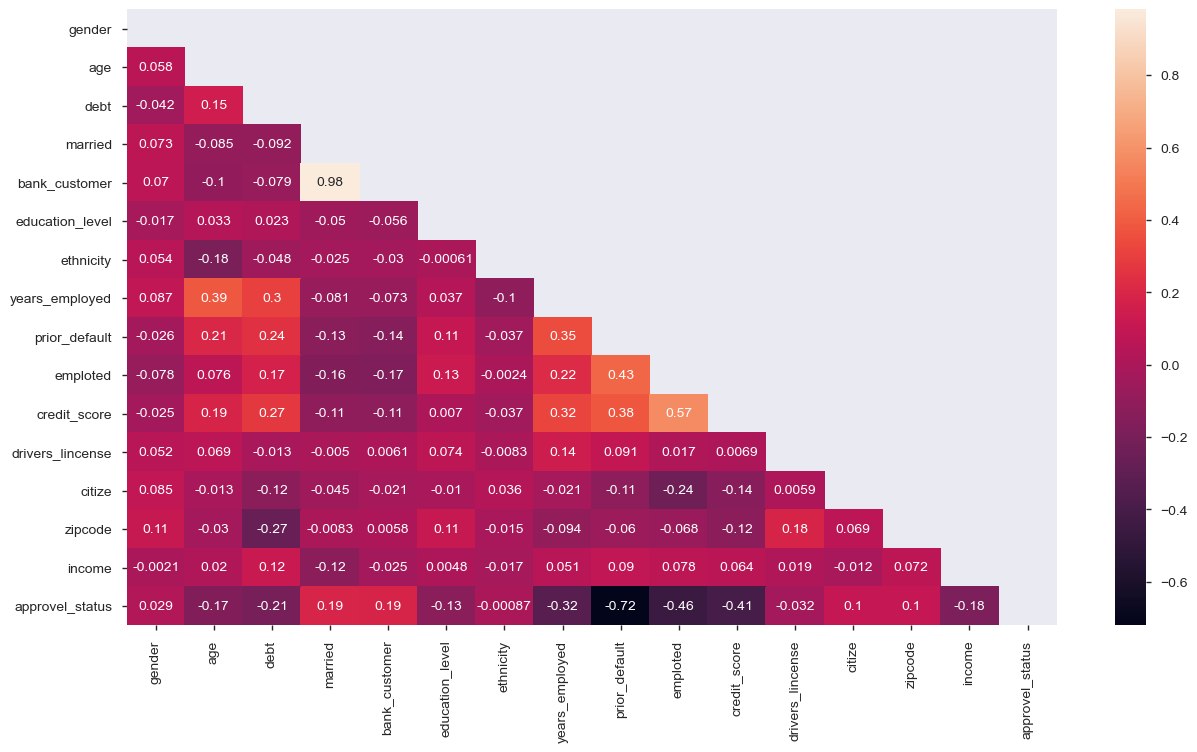

In [115]:
#importing seaborn 
import seaborn as sns
corr=data.corr()
plt.figure(figsize=(15,8))
mask=np.triu(np.ones_like(corr,dtype='bool'))
sns.heatmap(corr,mask=mask,annot=True)

### the relation between the feature and label
<p>in this step we want all features have a relation with labels whether it's positive relation or negative.</p>
<p>so we want the pearson values between the feature and label to be close to +1 or -1 </p>


##### the conclusion from the plot (part i)
<p>From the plot above we could see that the pearson value between column <code>approvel_status</code> and <code>ethnicity</code> is so close to zero it's <code>-0.00087</code> which means that there's no correlation between the columns so this could harm our model negatively if we use ethnicity as a feature. the same with <code>gender</code> column </p>
<p>

### the relation between the feature and each others
<P>we want all features have no relation with each other. And that's because if we use a lot of features that will have a very bad  effect on the model. So if there is a relation between two features, you can dorp one of them and use the other because both of them will the same effect

##### the conclusion from the plot (part ii)
<p>From the plot we could see that <code>bank_customer</code> and <code>married</code> columns have a strong relation between each other. so we will drop one of them</p>

# Feature Engineering
<p> in this step we will drop <code>married</code> and <code>ethnicity</code> 

In [116]:
data=data.drop(['married','ethnicity'],axis=1)

#  Splitting the dataset into train and test sets
<p>We have successfully converted all the non-numeric values to numeric ones.</p>
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.</p>
<p>Also, features like <code>DriversLicense</code> and <code>ZipCode</code> are not as important as the other features in the dataset for predicting credit card approvals. We should drop them to design our machine learning model with the best set of features.</p>

In [118]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
data = data.drop(['drivers_lincense', 'zipcode'], axis=1)

X=data.drop(['approvel_status'],axis=1)
y=data['approvel_status']
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X
                                                    ,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=42)# Import train_test_split
y

0      0
1      0
2      0
3      0
4      0
      ..
685    1
686    1
687    1
688    1
689    1
Name: approvel_status, Length: 690, dtype: int32

# Preprocessing the data (part ii)
<p>The data is now split into two separate sets - train and test sets respectively. We are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data. </p>
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use <code>CreditScore</code> as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>

In [119]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

# Fitting our models to the train set
<p>Essentially, predicting if a credit card application will be approved or not is a <a href="https://en.wikipedia.org/wiki/Statistical_classification">classification</a> task. <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names">According to UCI</a>, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. </p>
<p>This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.</p>
<p>in this step we will Apply these machine learning techniques <code>Logistic Regression</code> , <code>Random Forest</code>, <code>Support vector machine</code>, <code>Gradient Boosting</code> and finally <code>Extreme Gradient Boosting</code> ,then we will choose the best machine learning technique according to Accuracy score</p>
<p>Let's get started</p>

In [158]:
# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression
#importing Random Forest 
from sklearn.ensemble import RandomForestClassifier
#importing support vector machine
from sklearn.svm import SVC
#importing Grandient Boosting
from sklearn.ensemble import GradientBoostingClassifier
#importing Extreme Grandient Boosting
import xgboost as xgb
logreg=LogisticRegression(random_state=42)
rfc=RandomForestClassifier(random_state=42)
svm=SVC(random_state=42)
gbc=GradientBoostingClassifier(random_state=42)
xg_cl=xgb.XGBClassifier(random_state=42)
models=[('Logistic Regression',logreg),('Random Forest',rfc),('Support Vector Machine',svm),
      ('Gradient Boosting',gbc),('Extreme Gradient Boosting',xg_cl)]

In [159]:
#importing accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score
#creat a dictionary to append the accuracy score 
models_name={}
#creating a for loop to fit the models
for model_name ,model in models:
    model.fit(rescaledX_train,y_train)
    y_pred=model.predict(rescaledX_test)
    models_name[model_name]=accuracy_score(y_test,y_pred).round(3)
    print(model_name)
    print(confusion_matrix(y_test,y_pred))
    print('________________')
    

Logistic Regression
[[94  9]
 [26 99]]
________________
Random Forest
[[ 88  15]
 [ 19 106]]
________________
Support Vector Machine
[[ 91  12]
 [ 21 104]]
________________
Gradient Boosting
[[ 87  16]
 [ 19 106]]
________________
[17:59:02] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\H\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Extreme Gradient Boosting
[[ 81  22]
 [ 18 107]]
________________


In [160]:
models_score=pd.Series(models_name).to_frame()
models_score=models_score.rename(columns={0:'accuracy_score'})

In [161]:
models_score.sort_values(by='accuracy_score',ascending=False)

,accuracy_score
Support Vector Machine,0.855
Random Forest,0.851
Logistic Regression,0.846
Gradient Boosting,0.846
Extreme Gradient Boosting,0.825


### Conclusion after fitting the models
<p>According to accuracy score we found that <code>Logistic Regression</code> , <code>Random Forest</code>, <code>Support vector machine</code> and <code>Gradient Boosting</code> are doing approximatelly the same. So we will tune them all tyring to find the Best estimator</p>

#### Tunning Logistic regression model


In [193]:
from sklearn.model_selection import GridSearchCV
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs'],'tol' : [.01,0.001,0.0001],'max_iter' : [100,150,200]}
logreg_cv=GridSearchCV(estimator=logreg,param_grid=parameters,cv=10,scoring='accuracy')
logreg_cv.fit(rescaledX_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [100, 150, 200],
                         'penalty': ['l2'], 'solver': ['lbfgs'],
                         'tol': [0.01, 0.001, 0.0001]},
             scoring='accuracy')

In [194]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_.round(3))

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.01}
accuracy : 0.866


In [195]:
logreg_best_estimator=logreg_cv.best_estimator_
logreg_best_estimator.fit(rescaledX_train,y_train)
y_pred_logreg=logreg_cv.predict(rescaledX_test)
print('Accuracy Score :{}'.format(accuracy_score(y_test,y_pred_logreg).round(4)))


Accuracy Score :0.8421


#### tunning support vector machine

In [176]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm_cv=GridSearchCV(estimator=svm,param_grid=parameters,cv=10,scoring='accuracy')
svm_cv.fit(rescaledX_train,y_train)

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')},
             scoring='accuracy')

In [177]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_.round(3))

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}
accuracy : 0.87


In [179]:
svm_best_estimator=svm_cv.best_estimator_
svm_best_estimator.fit(rescaledX_train,y_train)
y_pred_svm=svm_cv.predict(rescaledX_test)
print('Accuracy Score :{}'.format(accuracy_score(y_test,y_pred_svm).round(4)))

Accuracy Score :0.8553


#### tunning Random Forest

In [183]:
parameters = {'criterion': ['gini', 'entropy'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
rfc_cv=GridSearchCV(estimator=rfc,param_grid=parameters,cv=10,scoring='accuracy')
rfc_cv.fit(rescaledX_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [184]:
print("tuned hpyerparameters :(best parameters) ",rfc_cv.best_params_)
print("accuracy :",rfc_cv.best_score_.round(3))

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
accuracy : 0.876


In [185]:
rfc_best_estimator=rfc_cv.best_estimator_
rfc_best_estimator.fit(rescaledX_train,y_train)
y_pred_rfc=rfc_best_estimator.predict(rescaledX_test)
print('Accuracy Score :{}'.format(accuracy_score(y_test,y_pred_rfc).round(4)))

Accuracy Score :0.864


#### Gradient Boosting

In [189]:
parameters = {'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
gbc_cv=GridSearchCV(estimator=gbc,param_grid=parameters,cv=10,scoring='accuracy')
gbc_cv.fit(rescaledX_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [190]:
print("tuned hpyerparameters :(best parameters) ",gbc_cv.best_params_)
print("accuracy :",gbc_cv.best_score_.round(3))

tuned hpyerparameters :(best parameters)  {'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
accuracy : 0.876


In [191]:
gbc_best_estimator=gbc_cv.best_estimator_
gbc_best_estimator.fit(rescaledX_train,y_train)
y_pred_gbc=gbc_best_estimator.predict(rescaledX_test)
print('Accuracy Score :{}'.format(accuracy_score(y_test,y_pred_gbc).round(4)))

Accuracy Score :0.8684


# Conclusion
<p>So after tuning we are left with <code>Gradient Boosting</code> the best fit to the model with Accuracy score equal to 87%</p>
<p> Finally we will plot the confusion matrix, get the classification report and know the importance features</p>


Text(0.5, 1.0, 'Confusion Matrix')

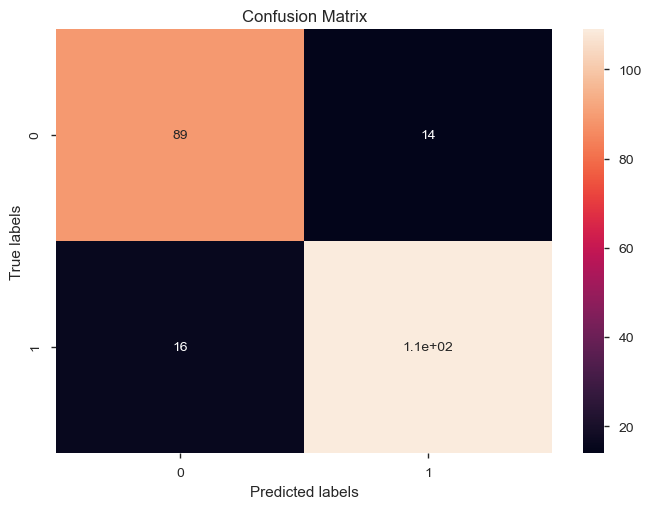

In [220]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred_gbc)
ax= plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')


In [199]:
confusion_matrix(y_test,y_pred_gbc)

array([[ 89,  14],
       [ 16, 109]], dtype=int64)

In [236]:
#classification report
from sklearn.metrics import classification_report,f1_score
classification_report(y_test,y_pred_gbc)


'              precision    recall  f1-score   support\n\n           0       0.85      0.86      0.86       103\n           1       0.89      0.87      0.88       125\n\n    accuracy                           0.87       228\n   macro avg       0.87      0.87      0.87       228\nweighted avg       0.87      0.87      0.87       228\n'

In [237]:
print('f1_score is {}'.format(f1_score(y_test,y_pred_gbc).round(4)))

f1_score is 0.879


C:\Users\H\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

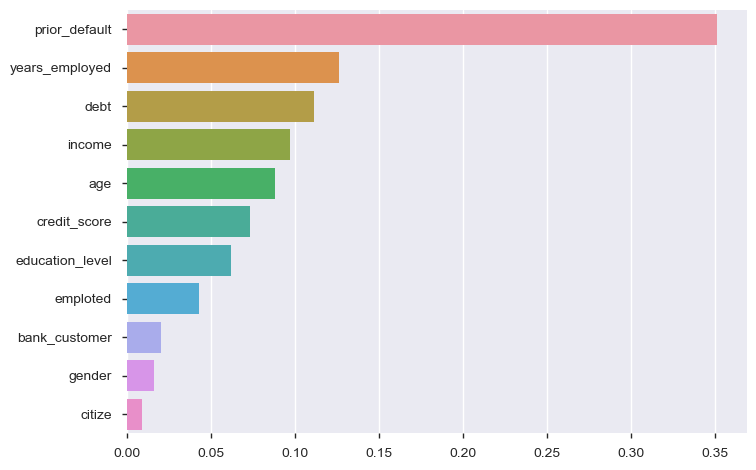

In [231]:
# feature importance
importance_gbc=pd.Series(gbc_best_estimator.feature_importances_,index=X.columns)
importance_gbc=importance_gbc.sort_values(ascending=False)
sns.barplot(importance_gbc,x=importance_gbc,y=importance_gbc.index)